# Exercise 2 Part 1

The function is given as

$f(x_1,x_2) = \sqrt{(x_1^2 + 4)} + \sqrt{(x_2^2+4)}$

The minimiser is

$(x_1,x_2) = (0,0)$

and the minimum is $4$

It is unique.

It is the global minima.

Since each component of the function is monotonically increasing, we can say that the current function is also simply monotonically increasing and only has a singular minima (also it is a convex function)

The function is convex, this we can say, because the determinant of the hessian is always positive

# Exercise 2 Part 2

In [ ]:
#Exercise 2, part 2 using only Newton's method

import numpy as np
import matplotlib.pyplot as plt
import math as m
from mpl_toolkits.mplot3d import Axes3D

# Define the function to be minimized
def f(x, y):
    return (x**2 + 4)**(1/2) + (y**2+4)**(1/2)

# Define the partial derivatives of the function with respect to x and y
def df_dx(x, y):
    return x/(x**2+4)**(1/2)

def df_dy(x, y):
    return y/(y**2+4)**(1/2)

def d2f_dydx(x,y):
    return 0

def d2f_dxdy(x,y):
    return 0

def d2f_dx2(x,y):
    return 4/(x**2+4)**(3/2)

def d2f_dy2(x,y):
    return 4/(y**2+4)**(3/2)


def L2Norm(x,y):
    grad_x = df_dx(x,y)
    grad_y = df_dy(x,y)
    return np.sqrt(grad_x ** 2 + grad_y ** 2)


# Define tolerance level
def tolerance(p):
    return 10 ** (-p)

# Define the newton optimisation algorithm
def newton_opt(start_x, start_y,p):

        x = start_x
        y = start_y
        history = []
        norm = L2Norm(x,y)
        TLevel = tolerance(p)
        count = 0

    # Perform the newton optimisation iterations

        while (norm > TLevel):
        # Calculate the gradients
            grad_x = df_dx(x, y)
            grad_y = df_dy(x, y)

            hess_x2 = d2f_dx2(x,y)
            hess_y2 = d2f_dy2(x,y)

            hess_yx = d2f_dydx(x,y)
            hess_xy = d2f_dxdy(x,y)

            grad = [[grad_x], [grad_y]]
            hess = [[hess_x2, hess_yx],[hess_xy, hess_y2]]

            hess_inv = np.linalg.inv(hess)

            # Update the parameters
            x = x - (hess_inv[0][0]*grad[0][0] + hess_inv[0][1]*grad[1][0])
            y = y - (hess_inv[1][0]*grad[0][0] + hess_inv[1][1]*grad[1][0])

            # Update Norm of gradient
            norm = L2Norm(x,y)

            # Save the history of the parameters
            history.append((x, y, f(x, y)))

            #count the iterations for convergence
            count = count+1

             # Plotting the points on the plot
            plt.plot(x, y, "*", ms=5.5)

        return x, y, f(x, y), history




# Plotting the level sets using a contour map
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
z = np.zeros(([len(x), len(y)]))
for i in range(0, len(x)):
    for j in range(0, len(y)):
        z[j, i] = f(x[i], y[j])

contours=plt.contour(x, y, z, 100, cmap=plt.cm.gnuplot)
plt.clabel(contours, inline=1, fontsize=10)

plt.xlabel('x')
plt.ylabel('y')

# Perform newton optimisation and plot the results
start_x, start_y = 2,2

#defining tolerance level
toler = 9

#here we are taking the values of the highest tolerance level
x_opt, y_opt, f_opt, history = newton_opt(start_x, start_y, toler)

print()
print("Minimum value = ", f_opt)
print("Minimiser in x = ", x_opt)
print("Minimiser in y = ", y_opt)

In [ ]:
#Exercise 2, part 2 using Newton's method with line search

import numpy as np
import matplotlib.pyplot as plt
import math as m
from mpl_toolkits.mplot3d import Axes3D

# Define the function to be minimized
def f(x, y):
    return (x**2 + 4)**(1/2) + (y**2+4)**(1/2)

# Define the partial derivatives of the function with respect to x and y
def df_dx(x, y):
    return x/(x**2+4)**(1/2)

def df_dy(x, y):
    return y/(y**2+4)**(1/2)

def d2f_dydx(x,y):
    return 0

def d2f_dxdy(x,y):
    return 0

def d2f_dx2(x,y):
    return 4/(x**2+4)**(3/2)

def d2f_dy2(x,y):
    return 4/(y**2+4)**(3/2)


def L2Norm(x,y):
    grad_x = df_dx(x,y)
    grad_y = df_dy(x,y)
    return np.sqrt(grad_x ** 2 + grad_y ** 2)


# Define tolerance level
def tolerance(p):
    return 10 ** (-p)

# Define the newton optimisation algorithm
def newton_opt(start_x, start_y,p):

        x = start_x
        y = start_y
        history = []
        norm = L2Norm(x,y)
        TLevel = tolerance(p)
        count = 0

    # Perform the newton optimisation iterations

        while (norm > TLevel):
        # Calculate the gradients
            grad_x = df_dx(x, y)
            grad_y = df_dy(x, y)

            hess_x2 = d2f_dx2(x,y)
            hess_y2 = d2f_dy2(x,y)

            hess_yx = d2f_dydx(x,y)
            hess_xy = d2f_dxdy(x,y)

            grad = [[grad_x], [grad_y]]
            hess = [[hess_x2, hess_yx],[hess_xy, hess_y2]]

            hess_inv = np.linalg.inv(hess)

            #in this question, we've been given that n_k = 1 for all iterations
            n=1

            # Update the parameters
            x = x - n*(hess_inv[0][0]*grad[0][0] + hess_inv[0][1]*grad[1][0])
            y = y - n*(hess_inv[1][0]*grad[0][0] + hess_inv[1][1]*grad[1][0])

            # Update Norm of gradient
            norm = L2Norm(x,y)

            # Save the history of the parameters
            history.append((x, y, f(x, y)))

            #count the iterations for convergence
            count = count+1

            # Plotting the points on the plot
            plt.plot(x, y, "*", ms=5.5)

        return x, y, f(x, y), history




# Plotting the level sets using a contour map
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
z = np.zeros(([len(x), len(y)]))
for i in range(0, len(x)):
    for j in range(0, len(y)):
        z[j, i] = f(x[i], y[j])

contours=plt.contour(x, y, z, 100, cmap=plt.cm.gnuplot)
plt.clabel(contours, inline=1, fontsize=10)

plt.xlabel('x')
plt.ylabel('y')

# Perform newton optimisation and plot the results
start_x, start_y = 2,2

#defining tolerance level
toler = 9

#here we are taking the values of the highest tolerance level
x_opt, y_opt, f_opt, history = newton_opt(start_x, start_y, toler)

print()
print("Minimum value = ", f_opt)
print("Minimiser in x = ", x_opt)
print("Minimiser in y = ", y_opt)

The above two codes are crashing...

Why?

When we check the steps and each iteration, it appears that in the computations of the given algorithms, python seems to deviate from the converging point due to possible truncation errors leading to a diverging solution.

Also it appears that when we take starting points $(2,2)$ we tend to oscillate between $(2,2)$ and $(-2,-2)$. Hence we may never actually reach our solution


# Exercise 2 Part 3


for inexact line search
For the initial value of a =  1
Minimised value =  4.0
Minimiser in x =  7.625256379536198e-10
Minimiser in y =  7.625256379536198e-10
Total iterations =  32


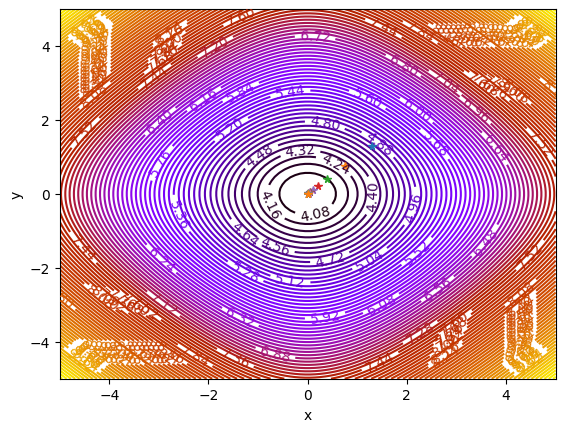

In [ ]:
#Exercise 2, part 3 using Gradient descent with inexact line search for starting point (2,2)

import numpy as np
import matplotlib.pyplot as plt
import math as m
from mpl_toolkits.mplot3d import Axes3D

# Define the function to be minimized
def f(x, y):
    return (x**2 + 4)**(1/2) + (y**2+4)**(1/2)

# Define the partial derivatives of the function with respect to x and y
def df_dx(x, y):
    return x/(x**2+4)**(1/2)

def df_dy(x, y):
    return y/(y**2+4)**(1/2)


def L2Norm(x,y):
    grad_x = df_dx(x,y)
    grad_y = df_dy(x,y)
    return np.sqrt(grad_x ** 2 + grad_y ** 2)


# Define tolerance level
def tolerance(p):
    return 10 ** (-p)


# Define the gradient descent inexact step length algorithm
def gradient_descent_inexact(start_x, start_y, a0, toler_level):

        # Initialize the parameters
        x = start_x
        y = start_y
        history = []
        norm = L2Norm(x,y)
        TLevel = tolerance(toler_level)
        count = 0

        #initialise values for our a, gamma, and p
        a = a0
        gamma = 0.5
        p = 0.5

        # Perform the gradient descent iterations

        while (norm > TLevel):
            # Calculate the gradients
            grad_x = df_dx(x, y)
            grad_y = df_dy(x, y)

            #now a loop to conduct inexact line search
            while (f(x - a*grad_x , y - a*grad_y) > (f(x,y) - gamma*a*((grad_x*grad_x) + (grad_y)*(grad_y)))):
                a = p*a

            # Update the parameters
            x = x - a * grad_x
            y = y - a * grad_y

            # Update Norm of gradient
            norm = L2Norm(x,y)

            #count the iterations for convergence
            count=count+1

            # Save the history of the parameters
            history.append((x, y, f(x, y)))

            # Plotting the points on the plot
            plt.plot(x, y, "*", ms = 5.5)

        return x, y, f(x, y), count, history


# Plotting the level sets using a contour map
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
z = np.zeros(([len(x), len(y)]))
for i in range(0, len(x)):
    for j in range(0, len(y)):
        z[j, i] = f(x[i], y[j])

contours=plt.contour(x, y, z, 100, cmap=plt.cm.gnuplot)
plt.clabel(contours, inline=1, fontsize=10)

plt.xlabel('x')
plt.ylabel('y')

#initialising stop and start points
start_x, start_y = 2,2

#define tolerance level
toler_level = 9

# Perform gradient descent (inexact)
a_init = 1
x_opt_inexact, y_opt_inexact, f_opt_inexact, iter_inexact, history_inexact = gradient_descent_inexact(start_x, start_y, a_init, toler_level)

print()
print("for inexact line search")
print("For the initial value of a = ", a_init)
print("Minimised value = ", f_opt_inexact)
print("Minimiser in x = ", x_opt_inexact)
print("Minimiser in y = ", y_opt_inexact)
print("Total iterations = ", iter_inexact)

# Exercise 2 part 4

In [ ]:
#Exercise 2, part 4 using only Newton's method with starting points (16,16)

import numpy as np
import matplotlib.pyplot as plt
import math as m
from mpl_toolkits.mplot3d import Axes3D

# Define the function to be minimized
def f(x, y):
    return (x**2 + 4)**(1/2) + (y**2+4)**(1/2)

# Define the partial derivatives of the function with respect to x and y
def df_dx(x, y):
    return x/(x**2+4)**(1/2)

def df_dy(x, y):
    return y/(y**2+4)**(1/2)

def d2f_dydx(x,y):
    return 0

def d2f_dxdy(x,y):
    return 0

def d2f_dx2(x,y):
    return 4/(x**2+4)**(3/2)

def d2f_dy2(x,y):
    return 4/(y**2+4)**(3/2)


def L2Norm(x,y):
    grad_x = df_dx(x,y)
    grad_y = df_dy(x,y)
    return np.sqrt(grad_x ** 2 + grad_y ** 2)


# Define tolerance level
def tolerance(p):
    return 10 ** (-p)

# Define the newton optimisation algorithm
def newton_opt(start_x, start_y,p):

        x = start_x
        y = start_y
        history = []
        norm = L2Norm(x,y)
        TLevel = tolerance(p)
        count = 0

    # Perform the newton optimisation iterations

        while (norm > TLevel):
        # Calculate the gradients
            grad_x = df_dx(x, y)
            grad_y = df_dy(x, y)

            hess_x2 = d2f_dx2(x,y)
            hess_y2 = d2f_dy2(x,y)

            hess_yx = d2f_dydx(x,y)
            hess_xy = d2f_dxdy(x,y)

            grad = [[grad_x], [grad_y]]
            hess = [[hess_x2, hess_yx],[hess_xy, hess_y2]]

            hess_inv = np.linalg.inv(hess)

            # Update the parameters
            x = x - (hess_inv[0][0]*grad[0][0] + hess_inv[0][1]*grad[1][0])
            y = y - (hess_inv[1][0]*grad[0][0] + hess_inv[1][1]*grad[1][0])

            # Update Norm of gradient
            norm = L2Norm(x,y)

            # Save the history of the parameters
            history.append((x, y, f(x, y)))

            #count the iterations for convergence
            count = count+1

             # Plotting the points on the plot
            plt.plot(x, y, "*", ms=5.5)

        return x, y, f(x, y), history




# Plotting the level sets using a contour map
x = np.linspace(-20, 20, 100)
y = np.linspace(-20, 20, 100)
z = np.zeros(([len(x), len(y)]))
for i in range(0, len(x)):
    for j in range(0, len(y)):
        z[j, i] = f(x[i], y[j])

contours=plt.contour(x, y, z, 100, cmap=plt.cm.gnuplot)
plt.clabel(contours, inline=1, fontsize=10)

plt.xlabel('x')
plt.ylabel('y')

# Perform newton optimisation and plot the results
start_x, start_y = 16,16

#defining tolerance level
toler = 9

#here we are taking the values of the highest tolerance level
x_opt, y_opt, f_opt, history = newton_opt(start_x, start_y, toler)

print()
print("Minimum value = ", f_opt)
print("Minimiser in x = ", x_opt)
print("Minimiser in y = ", y_opt)

In [ ]:
#Exercise 2, part 4 using Newton's method with line search using start = (16,16)

import numpy as np
import matplotlib.pyplot as plt
import math as m
from mpl_toolkits.mplot3d import Axes3D

# Define the function to be minimized
def f(x, y):
    return (x**2 + 4)**(1/2) + (y**2+4)**(1/2)

# Define the partial derivatives of the function with respect to x and y
def df_dx(x, y):
    return x/(x**2+4)**(1/2)

def df_dy(x, y):
    return y/(y**2+4)**(1/2)

def d2f_dydx(x,y):
    return 0

def d2f_dxdy(x,y):
    return 0

def d2f_dx2(x,y):
    return 4/(x**2+4)**(3/2)

def d2f_dy2(x,y):
    return 4/(y**2+4)**(3/2)


def L2Norm(x,y):
    grad_x = df_dx(x,y)
    grad_y = df_dy(x,y)
    return np.sqrt(grad_x ** 2 + grad_y ** 2)


# Define tolerance level
def tolerance(p):
    return 10 ** (-p)

# Define the newton optimisation algorithm
def newton_opt(start_x, start_y,p):

        x = start_x
        y = start_y
        history = []
        norm = L2Norm(x,y)
        TLevel = tolerance(p)
        count = 0

    # Perform the newton optimisation iterations

        while (norm > TLevel):
        # Calculate the gradients
            grad_x = df_dx(x, y)
            grad_y = df_dy(x, y)

            hess_x2 = d2f_dx2(x,y)
            hess_y2 = d2f_dy2(x,y)

            hess_yx = d2f_dydx(x,y)
            hess_xy = d2f_dxdy(x,y)

            grad = [[grad_x], [grad_y]]
            hess = [[hess_x2, hess_yx],[hess_xy, hess_y2]]

            hess_inv = np.linalg.inv(hess)

            #in this question, we've been given that n_k = 1 for all iterations
            n=1

            # Update the parameters
            x = x - n*(hess_inv[0][0]*grad[0][0] + hess_inv[0][1]*grad[1][0])
            y = y - n*(hess_inv[1][0]*grad[0][0] + hess_inv[1][1]*grad[1][0])

            # Update Norm of gradient
            norm = L2Norm(x,y)

            # Save the history of the parameters
            history.append((x, y, f(x, y)))

            #count the iterations for convergence
            count = count+1

            # Plotting the points on the plot
            plt.plot(x, y, "*", ms=5.5)

        return x, y, f(x, y), history




# Plotting the level sets using a contour map
x = np.linspace(-20, 20, 100)
y = np.linspace(-20, 20, 100)
z = np.zeros(([len(x), len(y)]))
for i in range(0, len(x)):
    for j in range(0, len(y)):
        z[j, i] = f(x[i], y[j])

contours=plt.contour(x, y, z, 100, cmap=plt.cm.gnuplot)
plt.clabel(contours, inline=1, fontsize=10)

plt.xlabel('x')
plt.ylabel('y')

# Perform newton optimisation and plot the results
start_x, start_y = 16,16

#defining tolerance level
toler = 9

#here we are taking the values of the highest tolerance level
x_opt, y_opt, f_opt, history = newton_opt(start_x, start_y, toler)

print()
print("Minimum value = ", f_opt)
print("Minimiser in x = ", x_opt)
print("Minimiser in y = ", y_opt)

The two codes above are crashing.



# Exercise 2 Part 5


for inexact line search
For the initial value of a =  1
Minimised value =  4.0
Minimiser in x =  1.1994782151099963e-09
Minimiser in y =  1.1994782151099963e-09
Total iterations =  46


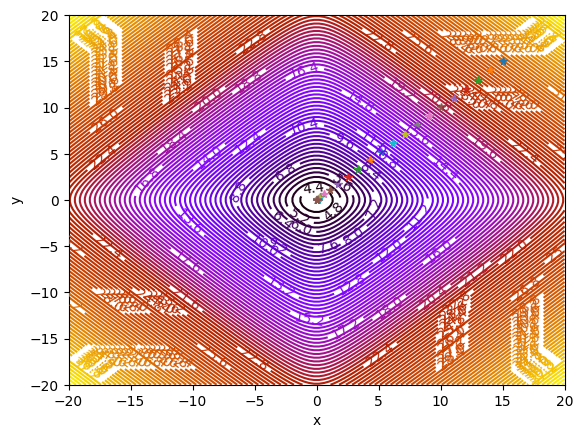

In [ ]:
#Exercise 2, part 5 using Gradient descent with inexact line search for starting point (16,16)

import numpy as np
import matplotlib.pyplot as plt
import math as m
from mpl_toolkits.mplot3d import Axes3D

# Define the function to be minimized
def f(x, y):
    return (x**2 + 4)**(1/2) + (y**2+4)**(1/2)

# Define the partial derivatives of the function with respect to x and y
def df_dx(x, y):
    return x/(x**2+4)**(1/2)

def df_dy(x, y):
    return y/(y**2+4)**(1/2)


def L2Norm(x,y):
    grad_x = df_dx(x,y)
    grad_y = df_dy(x,y)
    return np.sqrt(grad_x ** 2 + grad_y ** 2)


# Define tolerance level
def tolerance(p):
    return 10 ** (-p)


# Define the gradient descent inexact step length algorithm
def gradient_descent_inexact(start_x, start_y, a0, toler_level):

        # Initialize the parameters
        x = start_x
        y = start_y
        history = []
        norm = L2Norm(x,y)
        TLevel = tolerance(toler_level)
        count = 0

        #initialise values for our a, gamma, and p
        a = a0
        gamma = 0.5
        p = 0.5

        # Perform the gradient descent iterations

        while (norm > TLevel):
            # Calculate the gradients
            grad_x = df_dx(x, y)
            grad_y = df_dy(x, y)

            #now a loop to conduct inexact line search
            while (f(x - a*grad_x , y - a*grad_y) > (f(x,y) - gamma*a*((grad_x*grad_x) + (grad_y)*(grad_y)))):
                a = p*a

            # Update the parameters
            x = x - a * grad_x
            y = y - a * grad_y

            # Update Norm of gradient
            norm = L2Norm(x,y)

            #count the iterations for convergence
            count=count+1

            # Save the history of the parameters
            history.append((x, y, f(x, y)))

            # Plotting the points on the plot
            plt.plot(x, y, "*", ms = 5.5)

        return x, y, f(x, y), count, history


# Plotting the level sets using a contour map
x = np.linspace(-20, 20, 100)
y = np.linspace(-20, 20, 100)
z = np.zeros(([len(x), len(y)]))
for i in range(0, len(x)):
    for j in range(0, len(y)):
        z[j, i] = f(x[i], y[j])

contours=plt.contour(x, y, z, 100, cmap=plt.cm.gnuplot)
plt.clabel(contours, inline=1, fontsize=10)

plt.xlabel('x')
plt.ylabel('y')

#initialising stop and start points
start_x, start_y = 16,16

#define tolerance level
toler_level = 9

# Perform gradient descent (inexact)
a_init = 1
x_opt_inexact, y_opt_inexact, f_opt_inexact, iter_inexact, history_inexact = gradient_descent_inexact(start_x, start_y, a_init, toler_level)

print()
print("for inexact line search")
print("For the initial value of a = ", a_init)
print("Minimised value = ", f_opt_inexact)
print("Minimiser in x = ", x_opt_inexact)
print("Minimiser in y = ", y_opt_inexact)
print("Total iterations = ", iter_inexact)